In [1]:

import pandas as pd
# Importing numpy library for scientific computing
import numpy as np
# Importing seaborn library for creating informative and attractive statistical graphics
import seaborn as sns
# Importing matplotlib.pyplot library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

In [2]:
# Reading the data file using pandas library and storing its contents in a DataFrame object

df=pd.read_csv("framingham_heart_disease.csv")

In [3]:
# Displaying the column names of the DataFrame

df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [4]:
# Counting the number of missing values in each column of the DataFrame

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
# Displaying the first few rows of the DataFrame

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
#since education has vey less influence in this prediction and it having a large number of null values, drop the attribute

data = df.drop(['education'], axis = 1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Finding mean of attributes and replacing null values with mean values

In [7]:
# Calculating the mean values of certain columns of the DataFrame

mean_cigsPerDay = round(data["cigsPerDay"].mean())
mean_BPmeds = round(data["BPMeds"].mean())
mean_totChol = round(data["totChol"].mean())
mean_BMI = round(data["BMI"].mean())
mean_glucose = round(data["glucose"].mean())
mean_heartRate = round(data["heartRate"].mean())

In [8]:
# Replace missing values with Mean values

data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
data['BPMeds'].fillna(mean_BPmeds, inplace = True)
data['totChol'].fillna(mean_totChol, inplace = True)
data['BMI'].fillna(mean_BMI, inplace = True)
data['glucose'].fillna(mean_glucose, inplace = True)
data['heartRate'].fillna(mean_heartRate, inplace = True)

In [9]:
# Ensure that all missing values are filled

data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Analysis through visualizing data

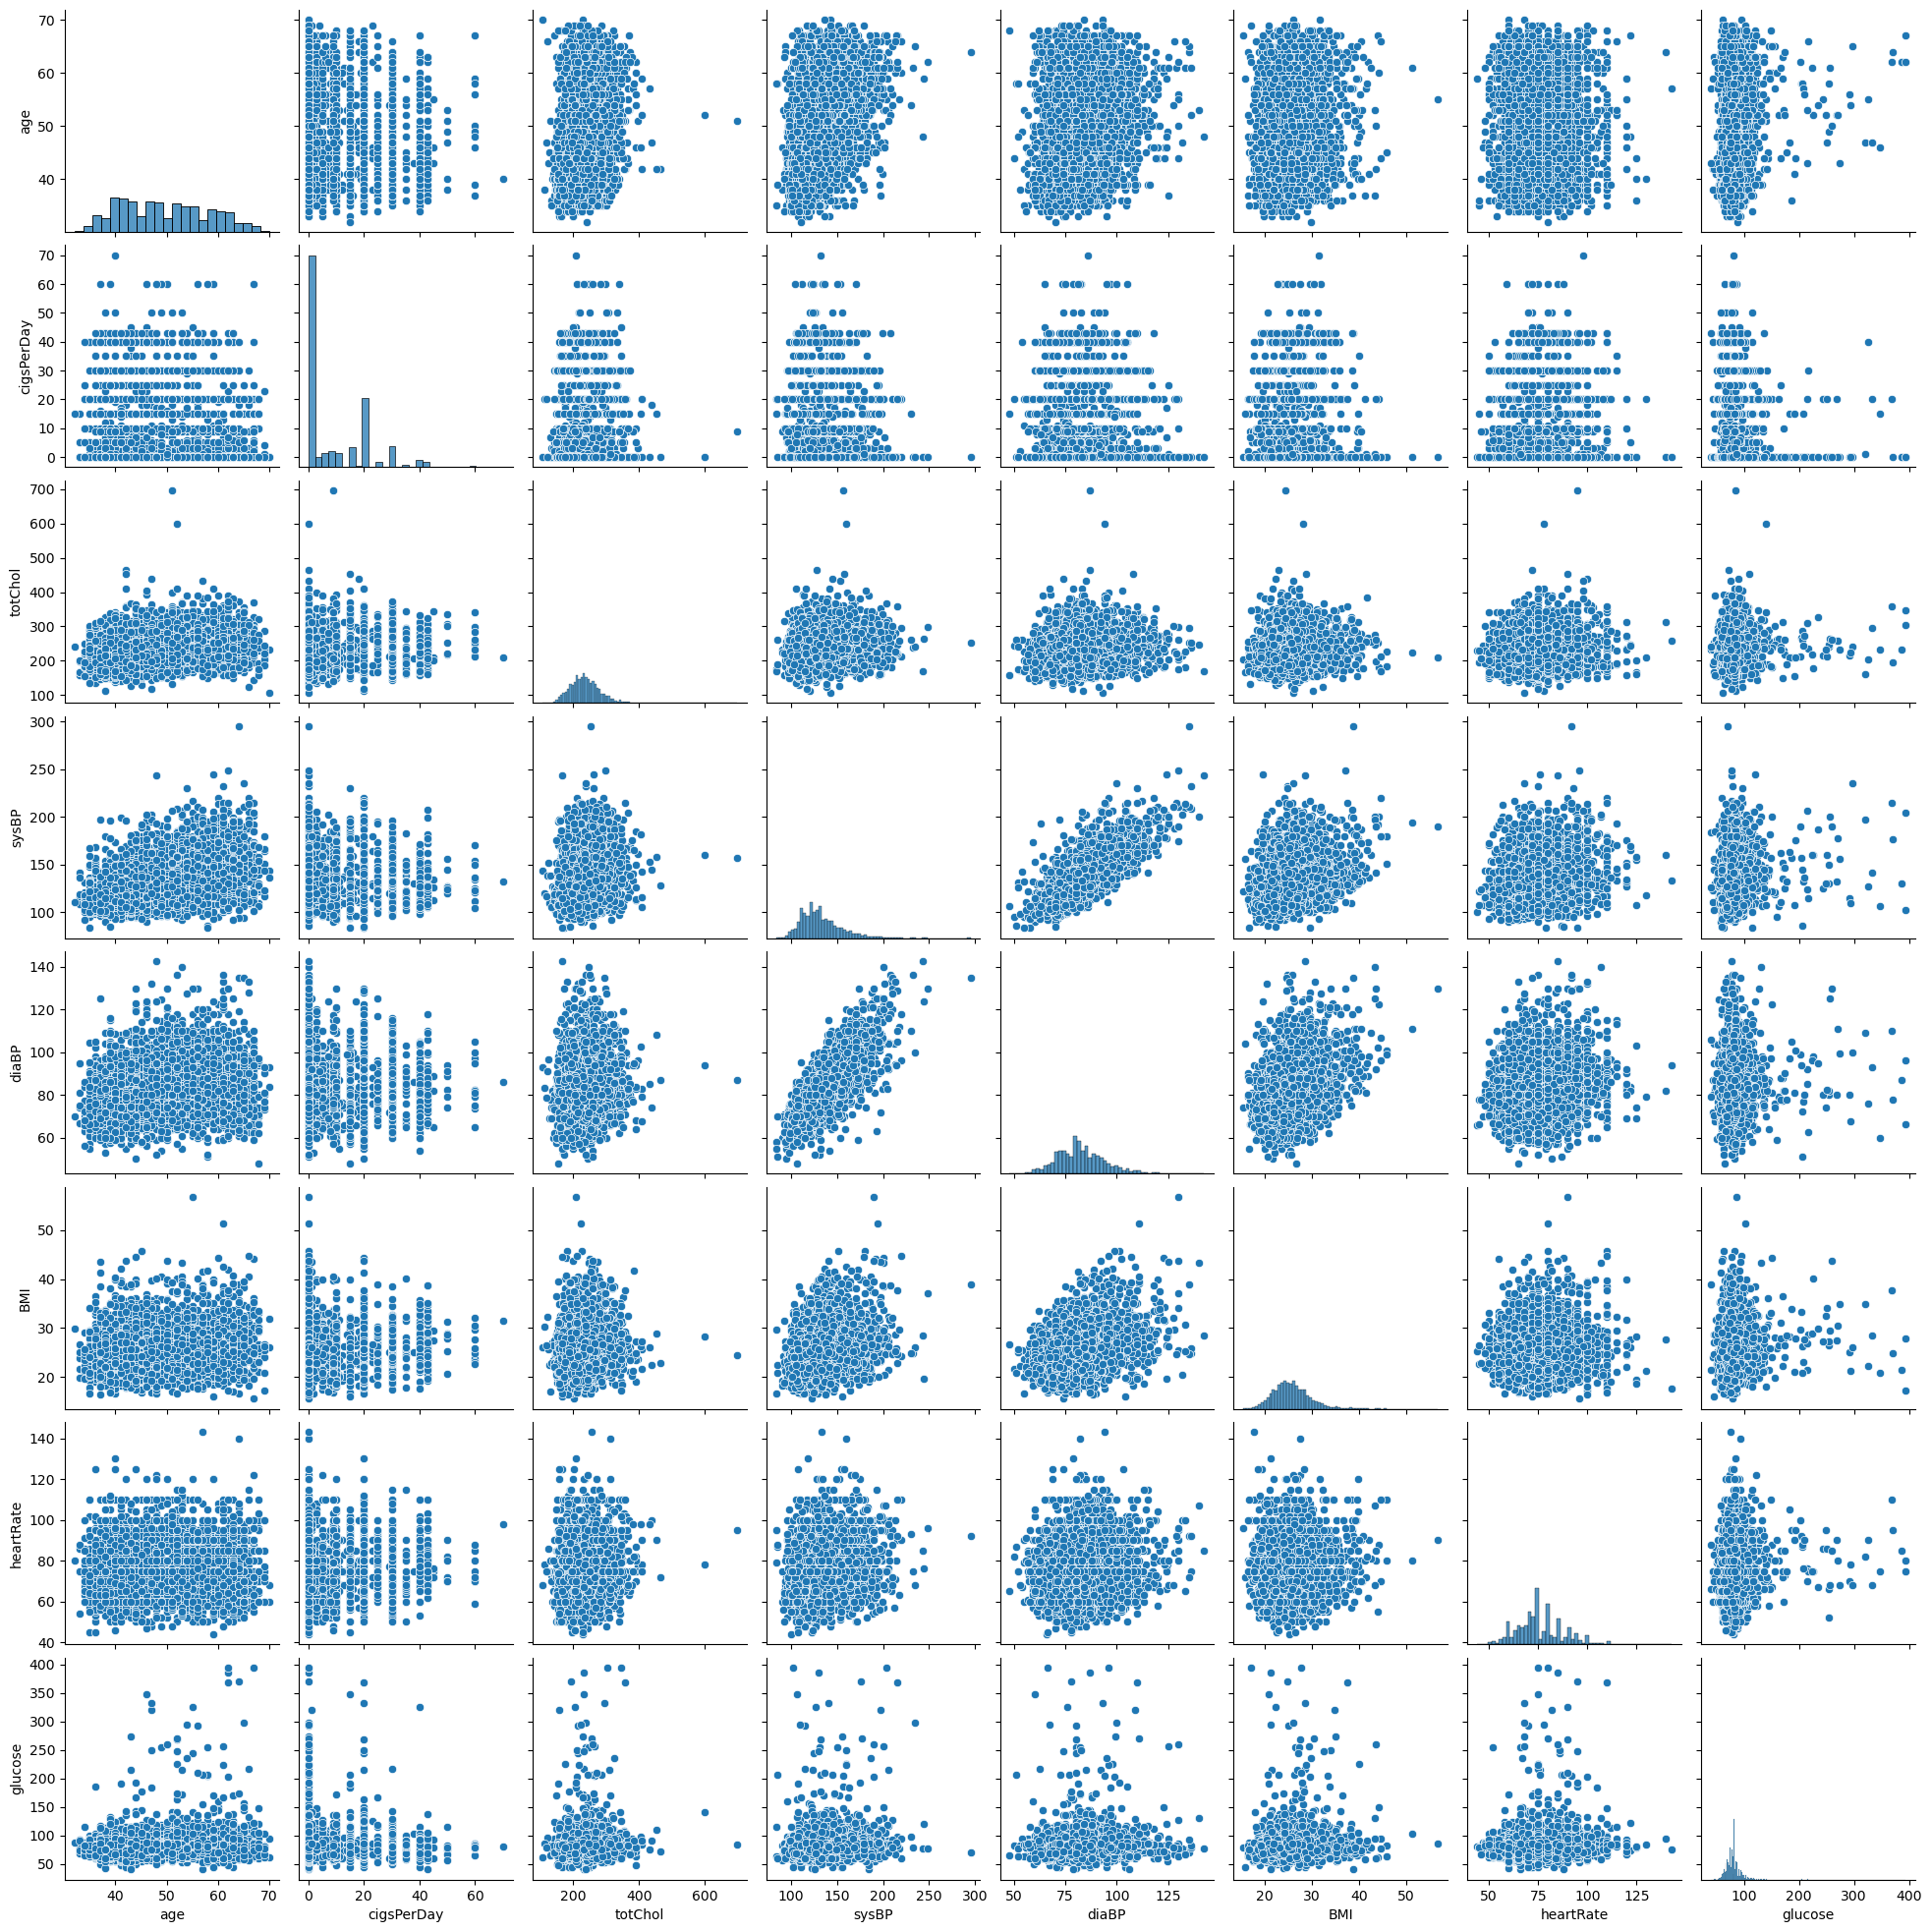

In [10]:
# Creating a pairwise scatter plot of selected columns in the DataFrame

sns.pairplot(data[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]);

In [11]:
# Splitting the DataFrame into predictor variables and target variable

X = data.drop('TenYearCHD',axis=1)

# Load the target variable to y

y=data['TenYearCHD']

In [12]:
# Train/Test splitting of data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [13]:
# Initializing Logistic Regression Model

from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()

# Train the Logistic Regression Model

Classifier.fit(X_train,y_train)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:

# Predicting the target variable using the trained model and the test data
y_test_hat = Classifier.predict(X_test)

# Creating a DataFrame to store the actual and predicted values of the target variable
Results = pd.DataFrame({'Actual': y_test, 'Predictions': y_test_hat})

# Displaying the first 5 rows of the Results DataFrame
Results.head(5)

,Actual,Predictions
906,0,0
857,0,0
2761,0,0
108,1,0
2894,0,0


In [15]:
# Importing the accuracy_score function from the scikit-learn library
from sklearn.metrics import accuracy_score

# Calculating the accuracy score of the predicted values
print(accuracy_score(y_test,y_test_hat))

0.8718553459119497


In [16]:
# Predicting the target variable for the training data
y_train_hat = Classifier.predict(X_train)

In [17]:
# Calculating the accuracy score of the predicted values for the training data
print(accuracy_score(y_train, y_train_hat))

0.8418745785569791


In [27]:
y_test_hat_proba = Classifier.predict_proba(X_test)
y_test_hat_proba

array([[0.82371709, 0.17628291],
       [0.93119892, 0.06880108],
       [0.89832015, 0.10167985],
       ...,
       [0.75989475, 0.24010525],
       [0.77902946, 0.22097054],
       [0.91234994, 0.08765006]])

In [18]:
# Import the confusion_matrix function from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the test set and output it to the console.
cm = confusion_matrix(y_test,y_test_hat)
print(cm)

[[1097    9]
 [ 154   12]]


In [19]:
# Importing the seaborn library for visualization
import seaborn as sn

# Creating a heatmap using the confusion matrix with annotations
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)

# Setting the title, x-label and y-label of the heatmap
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


Text(95.72222222222221, 0.5, 'True Label')

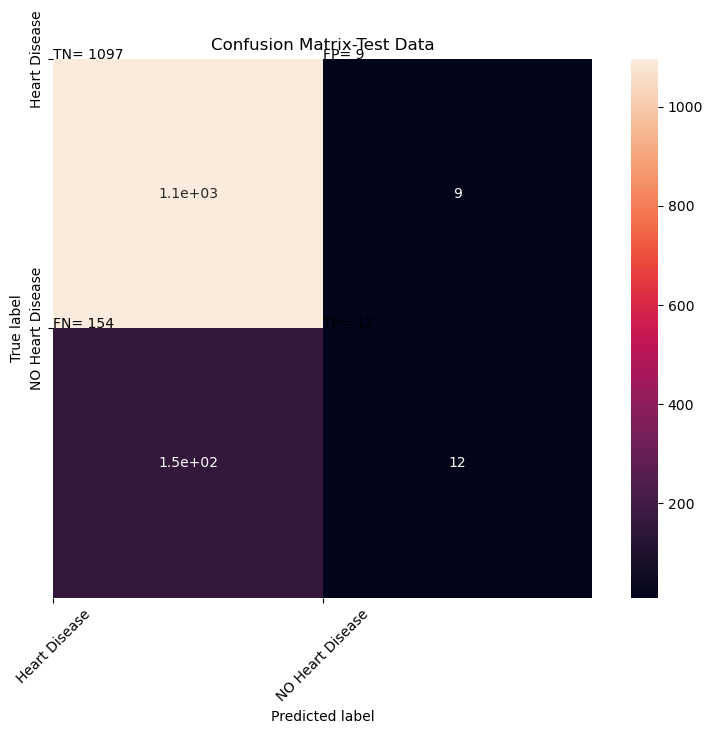

In [20]:
# Displaying an image of the confusion matrix with the Wistia color map
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)

# Creating a list of class names and setting the title, x-label and y-label of the plot
classNames = ['Heart Disease', 'NO Heart Disease']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Setting the ticks and labels for the x and y axes
tick_marks = np.arange(2)
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Adding the values of True Negatives, False Positives, False Negatives and True Positives to the plot
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j])+"= "+str(cm[i][j]))

# Displaying the plot
plt.show()


In [21]:
# Import the classification_report function from sklearn.metrics module
from sklearn.metrics import classification_report

# Call the classification_report function with y_test and y_test_hat as arguments and print the report, which includes metrics such as precision, recall, F1-score, and support for each class in the classification model


print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1106
           1       0.57      0.07      0.13       166

    accuracy                           0.87      1272
   macro avg       0.72      0.53      0.53      1272
weighted avg       0.84      0.87      0.83      1272



In [22]:
# Calculate metrics values individually
# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [ ]:
# Calculating precision, recall, specificity, and accuracy mathematically by using their equations 

In [23]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.07228915662650602


In [24]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.5714285714285714


In [25]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9918625678119349


In [26]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.8718553459119497
